<div style="text-align: center;">
  <h2>Milestone 5: Merging the Data and Storing in a Database/Visualizing Data</h2>
</div>

## Data Source and Handling

I am consolidating multiple data sources from previous milestone weeks and integrating them into the current analysis. This includes incorporating the Jupyter Notebooks developed earlier to ensure continuity and consistency in the data workflow.

## Steps

### 1 - Import from Flatfile Formating Data

In [ ]:
# Import from Flatfile Jupyter Notebook
%run "../../Week 5-6/Flat File Formating/Surenther_DSC540_Milestone2.ipynb"

### 2 - Insert the Flatfile datatransformation to SQL lite

In [11]:
# Insert the Flatfile datatransformation to SQL lite
import sqlite3

conn = sqlite3.connect('my_database.db')
df.to_sql('flat_file', conn, if_exists='append', index=False)

# Read the 'flat_file' table into a pandas DataFrame. I wanted data only for 2021
flat_df = pd.read_sql_query("SELECT * FROM flat_file where Year = '2021'", conn)
print("Flat File Table:")
print(flat_df.head(10))

conn.close()

Flat File Table:
          Area                                               Item     Element  \
0  Afghanistan                                  Almonds, in shell  Production   
1  Afghanistan  Anise, badian, coriander, cumin, caraway, fenn...  Production   
2  Afghanistan                                             Apples  Production   
3  Afghanistan                                           Apricots  Production   
4  Afghanistan                                             Barley  Production   
5  Afghanistan                      Butter and ghee of sheep milk  Production   
6  Afghanistan                                 Butter of cow milk  Production   
7  Afghanistan                                    Buttermilk, dry  Production   
8  Afghanistan                       Cantaloupes and other melons  Production   
9  Afghanistan                             Cattle fat, unrendered  Production   

   Year    Unit      Value             Flag  
0  2021  Tonnes   64256.00  Official figure  

### 3 - Import from Web Formating Data


In [ ]:
# Import from Webdata Jupyter Notebook
%run "../../Week 7-8/WebData Formating/Surenther_DSC540_Milestone3.ipynb"

# Ignore all Warnings
import warnings
warnings.filterwarnings('ignore')

### 4 - Insert the Web datatransformation to SQL lite

In [ ]:
# Insert the Web datatransformation to SQL lite
import sqlite3

conn = sqlite3.connect('my_database.db')
df.to_sql('web_data', conn, if_exists='append', index=False)

# Read the 'web_data' table into a pandas DataFrame.
web_df = pd.read_sql_query("SELECT * FROM web_data", conn)
print("Web data Table:")
print(web_df.head(10))

conn.close()

Web data Table:
                                           Area Arable% Total Arable
0                                    Kazakhstan     11%      296,697
1                                     Australia      4%      312,650
2                                        Canada      4%      382,590
3                                     Argentina     15%      422,088
4                                        Russia      7%    1,216,490
5                                     Lithuania     36%       22,790
6                                       Ukraine     57%      329,240
7  Saint Helena, Ascension and Tristan da Cunha     10%           40
8                                        Latvia     22%       13,620
9                                      Paraguay     12%       47,340


### 5 - Import from API Formating Data

In [ ]:
# Import from API Jupyter Notebook
%run "../../Week 9-10/APIData Formating/Surenther_DSC540_Milestone4.ipynb"

In [ ]:
# Insert the Web datatransformation to SQL lite
import sqlite3
import pandas as pd

conn = sqlite3.connect('my_database.db')
df_weather.to_sql('api_data', conn, if_exists='append', index=False)

# Read the 'web_data' table into a pandas DataFrame. I wanted data only for 2021
api_df = pd.read_sql_query("SELECT * FROM api_data", conn)
print("api data Table:")
print(api_df.head(10))

conn.close()

api data Table:
         Country   Latitude   Longitude  Avg_Temp_C  Total_Rainfall_mm
0        Eritrea  15.000000   39.000000   19.438630              366.5
1       Cameroon   6.000000   12.000000   23.237534             1438.5
2     Montenegro  42.500000   19.300000   12.844932             2051.8
3           Fiji -17.713400  178.065000   22.282740             2704.1
4        Tunisia  34.000000    9.000000   22.622192               38.7
5        Senegal  14.000000  -14.000000   30.609315              412.8
6  South Georgia -54.500000  -37.000000    3.296986             1299.7
7         Brazil -10.000000  -55.000000   24.965205             2189.7
8  Liechtenstein  47.266667    9.533333    9.531781             1836.5
9         Mexico  23.000000 -102.000000   17.403836              471.2


### 6 - Joining all 3 tables together

In [13]:
# Joining all 3 tables into one

# Define SQLite database file
database_name = 'my_database.db'

# Connect to the SQLite database
conn = sqlite3.connect(database_name)

# SQL Query to join the tables
# Using Inner Join to get only records that have matches in all three tables.
join_query = """
SELECT
    ff.Area,
    ff.Item,
    ff.Element,
    ff.Year,
    ff.Unit,
    ff.Value,
    ff.Flag,
    wd."Arable%",
    wd."Total Arable",
    ad.Latitude,
    ad.Longitude,
    ad.Avg_Temp_C,
    ad.Total_Rainfall_mm
FROM
    flat_file AS ff
INNER JOIN
    web_data AS wd ON ff.Area = wd.Area
INNER JOIN
    api_data AS ad ON ff.Area = ad.Country;
"""

# Read the joined data into a pandas DataFrame
try:
    merged_df = pd.read_sql_query(join_query, conn)
    print("\nJoined Dataset:")
    print(merged_df)
except pd.io.sql.DatabaseError as e:
    print(f"Error executing SQL query: {e}")
finally:
    # Close the database connection
    conn.close()


Joined Dataset:
                 Area                Item     Element  Year    Unit     Value  \
0         Afghanistan   Almonds, in shell  Production  1976  Tonnes   9800.00   
1         Afghanistan   Almonds, in shell  Production  1977  Tonnes   9000.00   
2         Afghanistan   Almonds, in shell  Production  1978  Tonnes  12000.00   
3         Afghanistan   Almonds, in shell  Production  1979  Tonnes  10500.00   
4         Afghanistan   Almonds, in shell  Production  1980  Tonnes   9900.00   
...               ...                 ...         ...   ...     ...       ...   
11025451   Micronesia  Vegetables Primary  Production  2019  Tonnes   9247.71   
11025452   Micronesia  Vegetables Primary  Production  2020  Tonnes   9255.90   
11025453   Micronesia  Vegetables Primary  Production  2021  Tonnes   9223.75   
11025454   Micronesia  Vegetables Primary  Production  2022  Tonnes   9208.19   
11025455   Micronesia  Vegetables Primary  Production  2023  Tonnes   9192.77   

          

### 7 - Saving Combined data into a new table

In [14]:
conn_save = sqlite3.connect(database_name)
merged_df.to_sql('combined_dataset', conn_save, if_exists='replace', index=False)
conn_save.close()
print("\nCombined data saved to new table 'combined_dataset' in the database.")


Combined data saved to new table 'combined_dataset' in the database.


### 8 - Convert necessary fields for Visualization

In [16]:
# Convert 'Arable%' to numeric (remove '%' and convert to float)
merged_df['Arable%_numeric'] = pd.to_numeric(merged_df['Arable%'].str.replace('%', ''), errors='coerce')

# Convert 'Total Arable' to numeric (remove commas and convert to float)
merged_df['Total Arable_numeric'] = pd.to_numeric(merged_df['Total Arable'].str.replace(',', ''), errors='coerce')


### 9 - Visualization: Arable Land Percentage vs. Total Rainfall (Spans web_data and api_data)

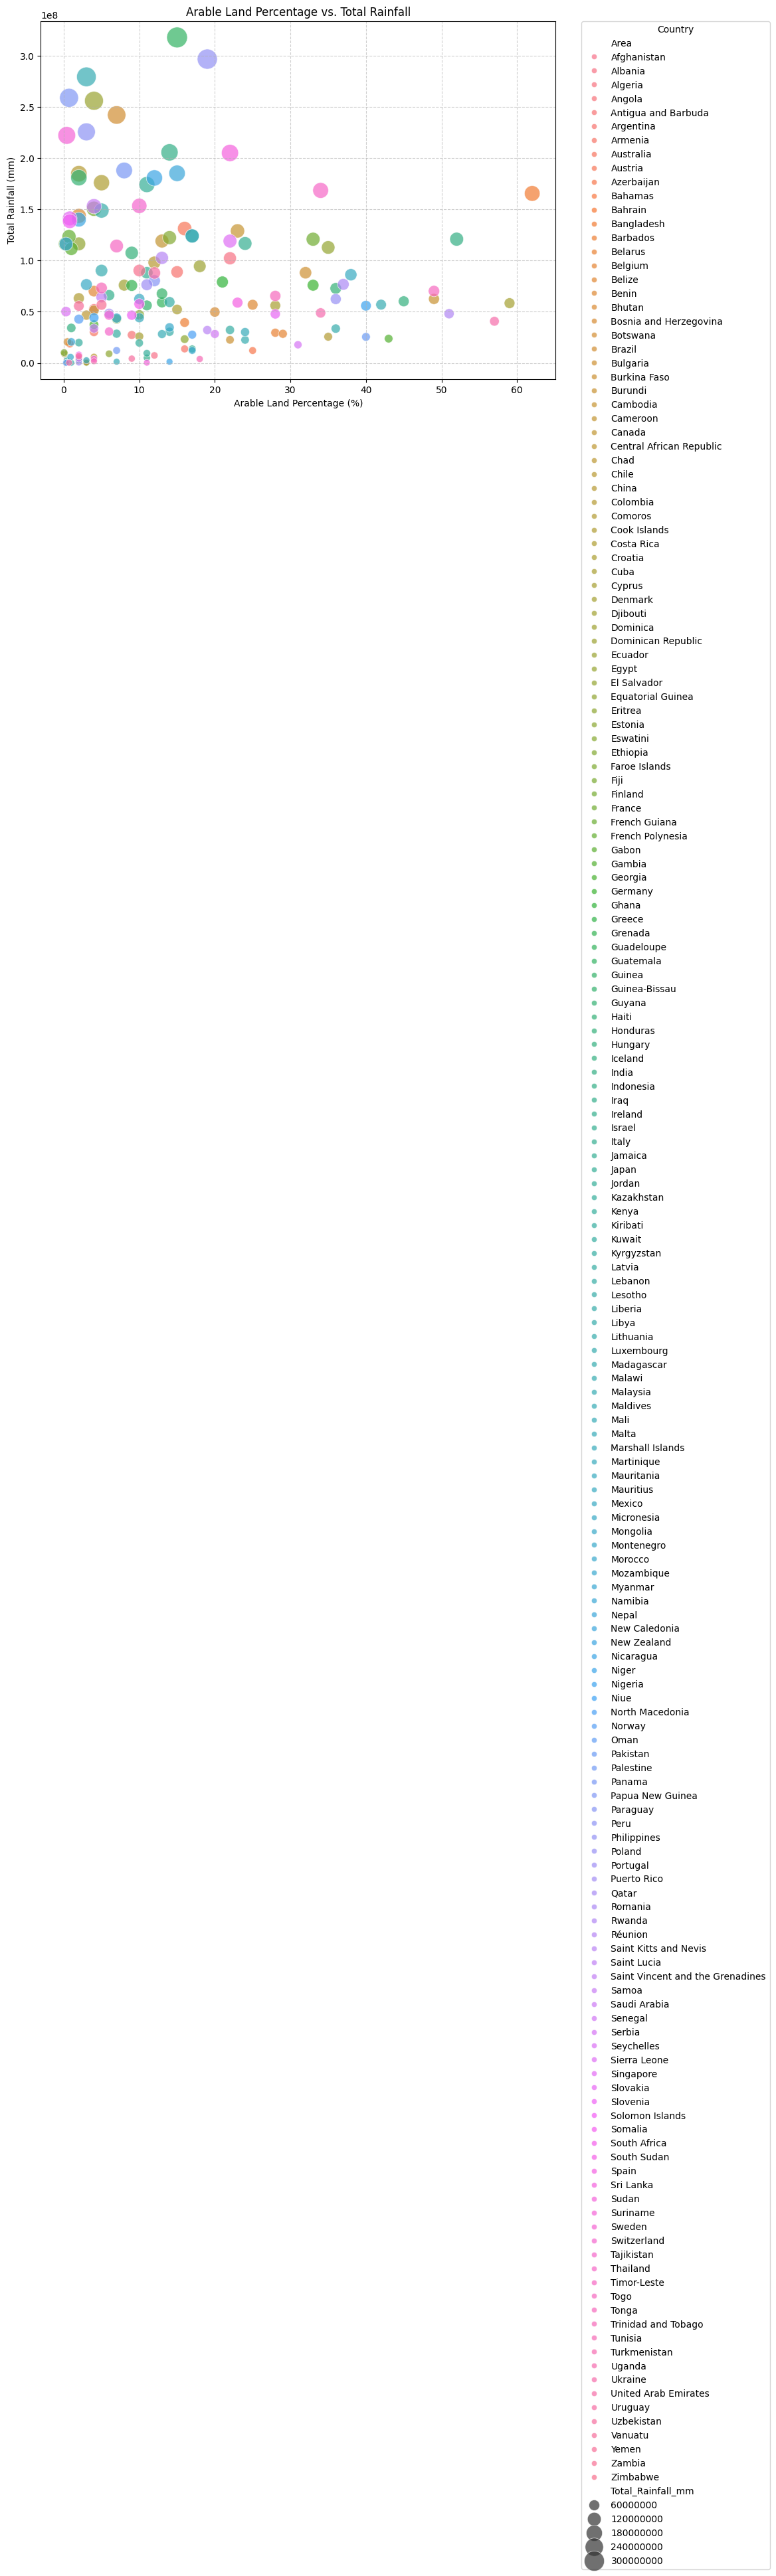

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_arable_rain = merged_df.groupby('Area').agg(
        Arable_Percent=('Arable%_numeric', 'mean'), # Use the numeric column
        Total_Rainfall_mm=('Total_Rainfall_mm', 'sum')
    ).reset_index().dropna()

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Arable_Percent', y='Total_Rainfall_mm', data=df_arable_rain, hue='Area', size='Total_Rainfall_mm', sizes=(50, 500), alpha=0.7)
plt.title('Arable Land Percentage vs. Total Rainfall')
plt.xlabel('Arable Land Percentage (%)')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

**Key Observations:Arable Land Percentage vs. Total Rainfall**

* **No Strong Linear Correlation:** The plot generally shows **no strong linear correlation** between a country's arable land percentage and its total annual rainfall.

* **Varied Rainfall at Low Arable Land:** Countries with very low arable land percentages (e.g., those on the far left of the X-axis) experience a wide range of rainfall, from very dry to very wet.

* **Varied Rainfall at High Arable Land:** Similarly, countries with higher arable land percentages also exhibit varied rainfall amounts.

* **High Rainfall Distribution:** There are some countries with exceptionally high total rainfall (represented by large circles towards the top of the plot). These countries appear across different arable land percentages, although some of the highest rainfall points are associated with countries having a relatively lower arable land percentage.

* **Clustering in Lower/Moderate Rainfall:** Many countries are clustered in the lower to moderate rainfall ranges, spanning various arable land percentages.


* **Implications:** In summary, the chart suggests that while rainfall is undoubtedly a critical factor for agriculture, the *proportion* of a country's land that is arable is not solely determined by the amount of rainfall it receives. Other geographical, climatic, and human factors (such as soil quality, topography, historical land use, or irrigation infrastructure) likely play significant roles in defining a country's arable land.

### 10 - Visualization: Production Value vs. Average Temperature (Spans flat_file and api_data)

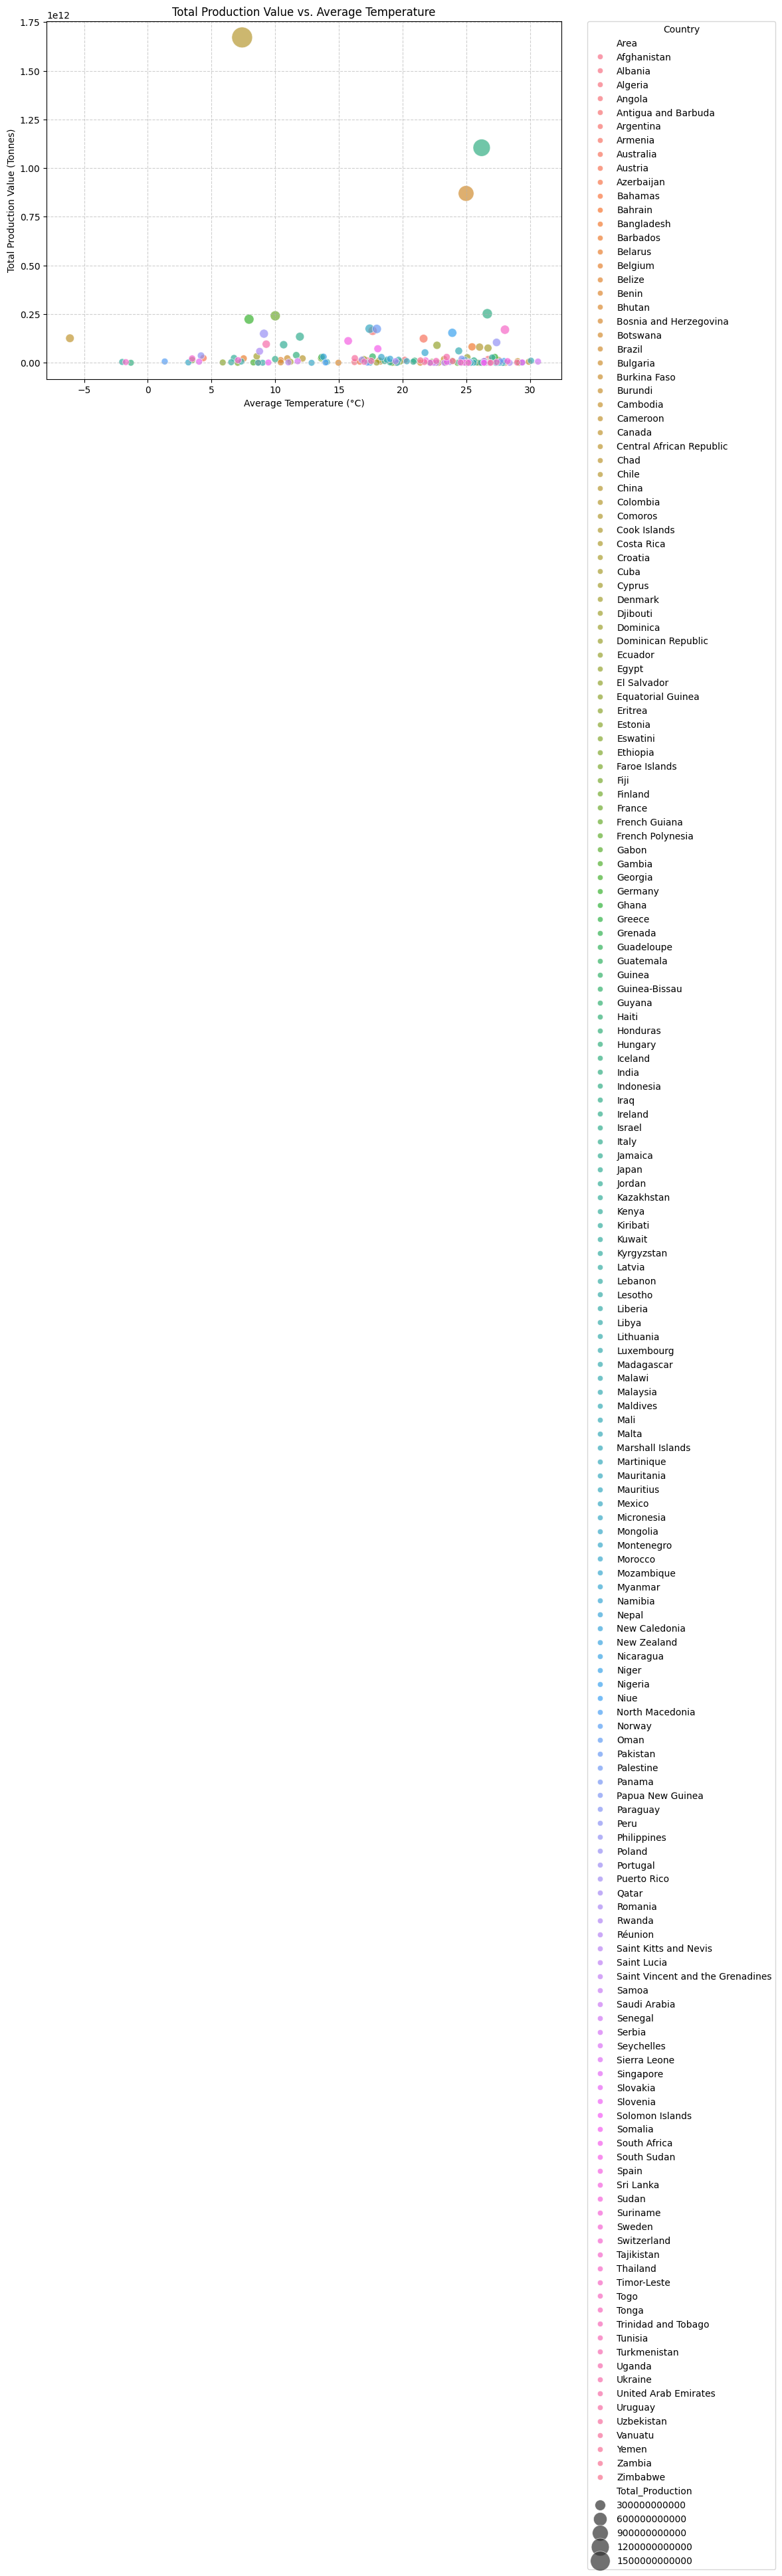

In [20]:
# Aggregate production value by Area for a scatter plot
df_prod_temp = merged_df.groupby('Area').agg(
    Total_Production=('Value', 'sum'),
    Avg_Temp_C=('Avg_Temp_C', 'mean')
    ).reset_index().dropna()

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Avg_Temp_C', y='Total_Production', data=df_prod_temp, hue='Area', size='Total_Production', sizes=(50, 500), alpha=0.7)
plt.title('Total Production Value vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Production Value (Tonnes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

### 11 - Visualization: Total Rainfall by Country (from api_data)

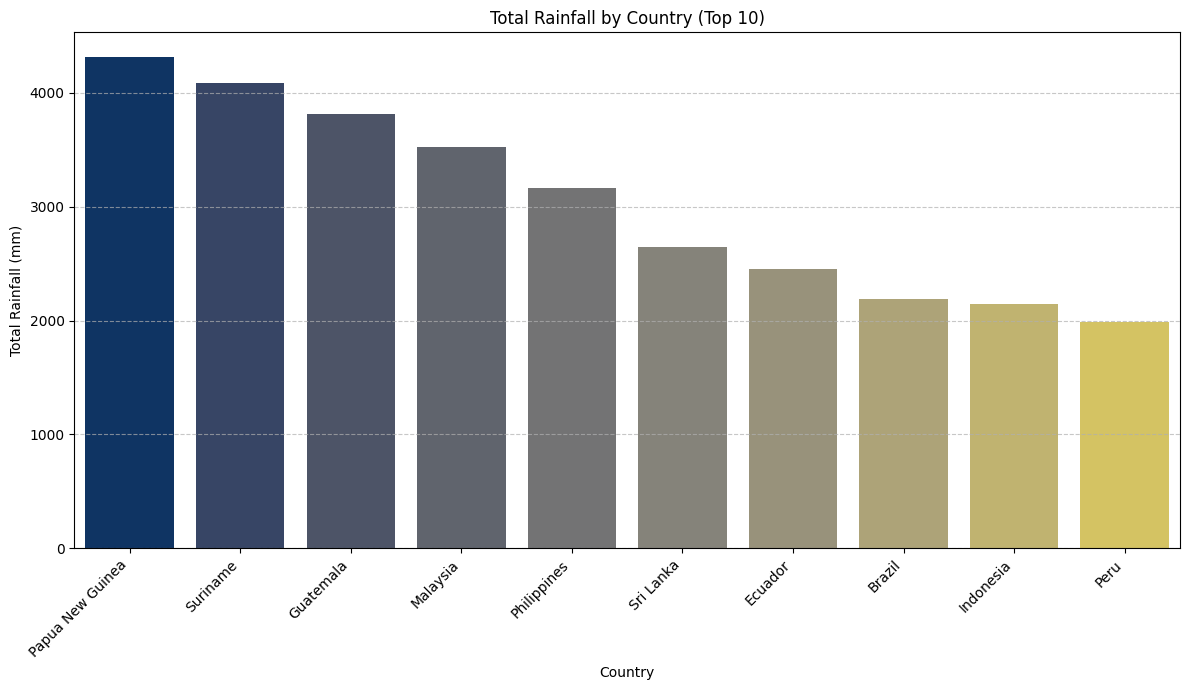

In [22]:
# Select top N countries by total rainfall
top_rain_countries = merged_df.groupby('Area')['Total_Rainfall_mm'].sum().nlargest(10).index
df_rain_plot = merged_df[merged_df['Area'].isin(top_rain_countries)].drop_duplicates(subset=['Area', 'Total_Rainfall_mm'])

plt.figure(figsize=(12, 7))
sns.barplot(x='Area', y='Total_Rainfall_mm', data=df_rain_plot.sort_values(by='Total_Rainfall_mm', ascending=False), palette='cividis')
plt.title('Total Rainfall by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 12 - Visualization: Average Temperature by Country (from api_data)

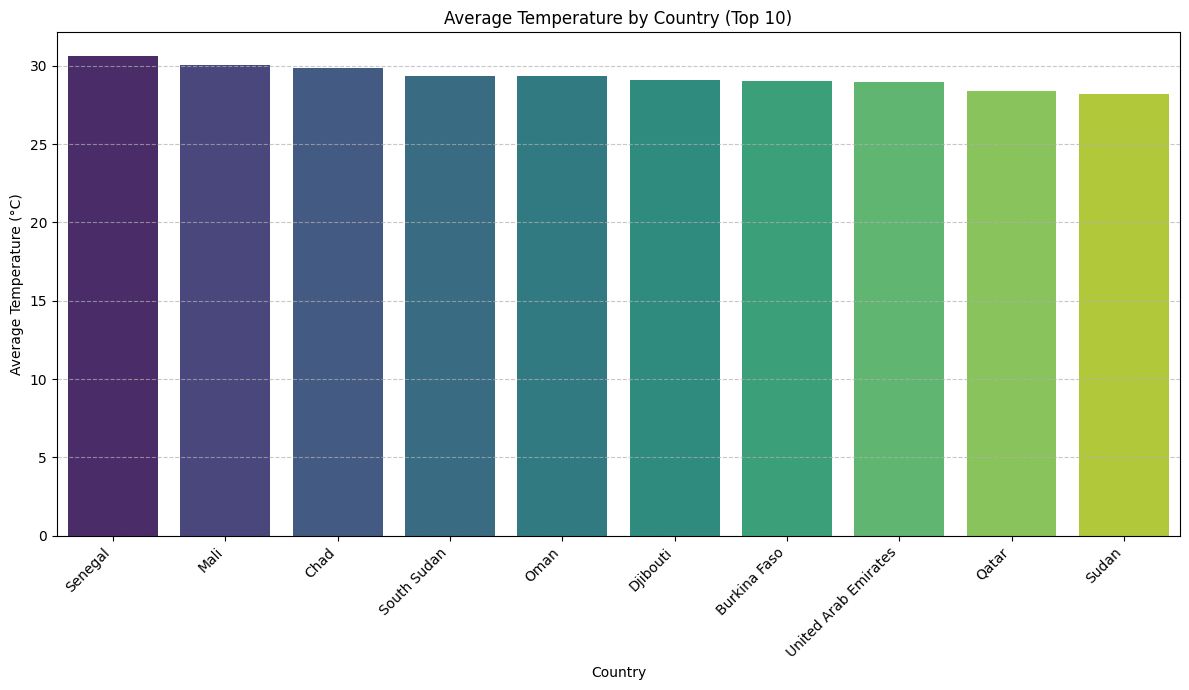

In [24]:
# Select top N countries by average temperature
top_temp_countries = merged_df.groupby('Area')['Avg_Temp_C'].mean().nlargest(10).index
df_temp_plot = merged_df[merged_df['Area'].isin(top_temp_countries)].drop_duplicates(subset=['Area', 'Avg_Temp_C'])

plt.figure(figsize=(12, 7))
sns.barplot(x='Area', y='Avg_Temp_C', data=df_temp_plot.sort_values(by='Avg_Temp_C', ascending=False), palette='viridis')
plt.title('Average Temperature by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 13 - Visualization: Top 10 Production Items (from flat_file)

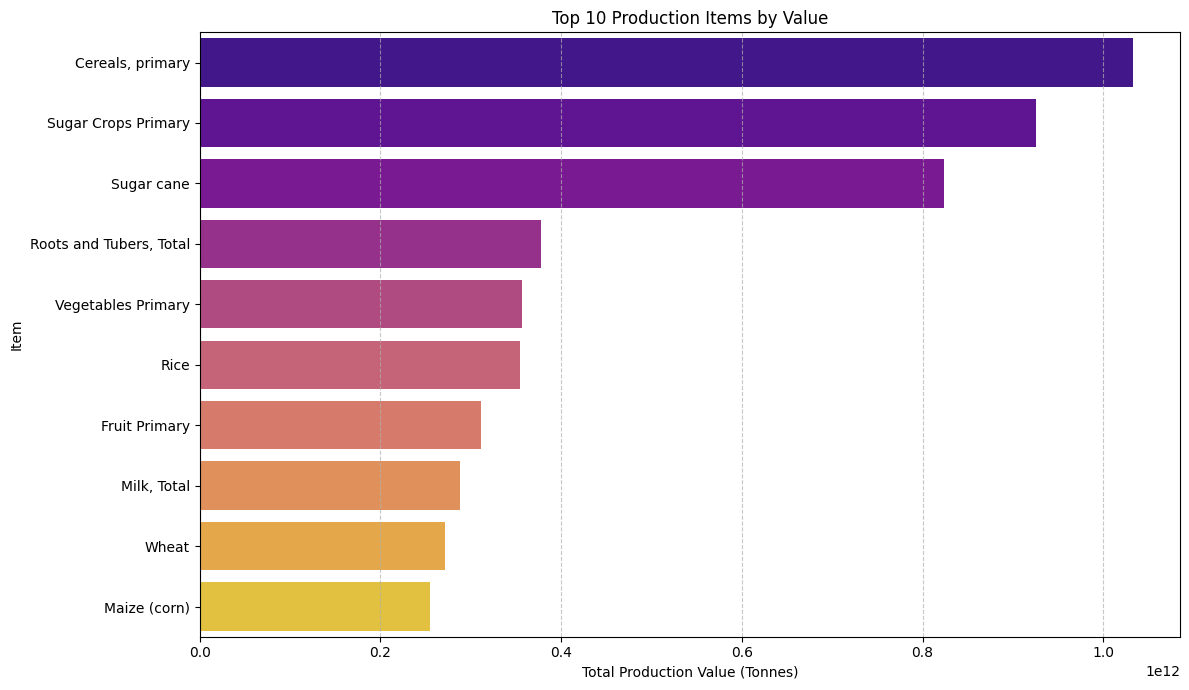

In [27]:
# Aggregate production value by Item
top_items = merged_df.groupby('Item')['Value'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Value', y='Item', data=top_items, palette='plasma')
plt.title('Top 10 Production Items by Value')
plt.xlabel('Total Production Value (Tonnes)')
plt.ylabel('Item')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 14 - Visualization: Top 10 Countries by Total Arable Land (from web_data)

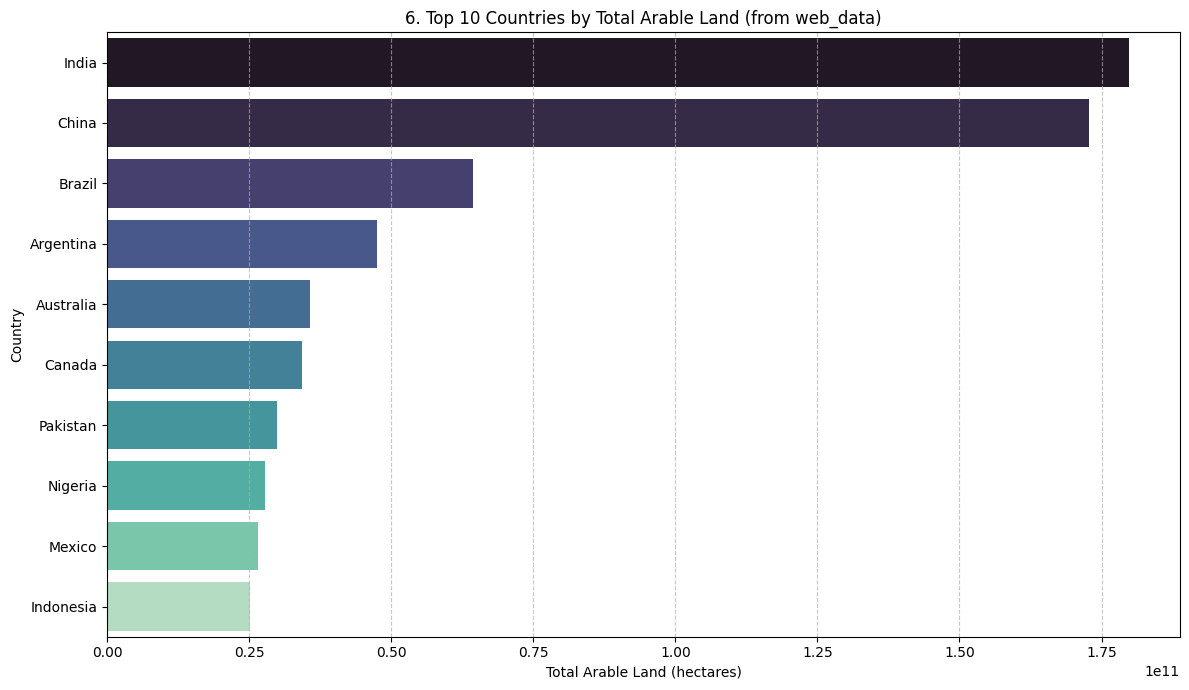

In [28]:
# Aggregate Total Arable by Area
top_arable_countries = merged_df.groupby('Area')['Total Arable_numeric'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Total Arable_numeric', y='Area', data=top_arable_countries, palette='mako')
plt.title('6. Top 10 Countries by Total Arable Land (from web_data)')
plt.xlabel('Total Arable Land (hectares)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()